In [1]:
# Library Import

import time
import os

from time import sleep
from datetime import datetime, timedelta

%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np

# import ydata_profiling

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [2]:
news = pd.read_csv('C:/Users/jjska/Desktop/StockPredictionByTextMining/Dataset/Output/text_analysis_completed_data.csv')
stocks = pd.read_csv('C:/Users/jjska/Desktop/StockPredictionByTextMining/Dataset/Output/stock_analysis_completed_data.csv')

In [5]:
X = stocks.merge(news, on='Date', how='left')
X.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,...,bfs_neg,bfs_neu,bfs_pos,paf_neg,paf_neu,paf_pos,vad_neg,vad_neu,vad_pos,vad_compound
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,...,0.000000,19.726527,0.772285,2.433325,14.463045,0.654019,0.102095,0.887905,0.010000,-0.130795
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,...,1.994734,21.683010,2.999998,2.090888,16.970401,3.261286,0.020407,0.933519,0.046074,0.054081
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,...,0.666535,11.250165,2.432849,0.611766,10.516358,1.132253,0.053672,0.856730,0.071079,0.022152
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,...,1.551042,23.577997,0.999993,0.967349,20.643528,0.547569,0.015778,0.862704,0.047481,0.032322
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,...,0.859929,10.687515,4.987508,0.933394,9.042120,3.245865,0.012059,0.888529,0.099412,0.141247


In [6]:
X.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'transaction_amount', 'transaction_ratio', 'Close_ratio', 'ma_5',
       'ma_20', 'ma_60', 'ma_120', 'RSI', 'change_ratio_bin_code', 'Publisher',
       'Description', 'News_Count', 'corpus', 'Keywords', 'mcdonald_scores',
       'mcdonald_pos_cnt', 'mcdonald_neg_cnt', 'bfs_neg', 'bfs_neu', 'bfs_pos',
       'paf_neg', 'paf_neu', 'paf_pos', 'vad_neg', 'vad_neu', 'vad_pos',
       'vad_compound'],
      dtype='object')

In [35]:
stocks_0 = stocks.copy()
stocks_0 = stocks.drop(['change_ratio_bin_code'], axis = 1)
# stocks_0.set_index('Date', inplace=True)
stocks_0.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,ma_5,ma_20,ma_60,ma_120,RSI
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,28.328133,25.635933,22.293344,18.989550,75.728128
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,28.489067,26.002533,22.518856,19.094833,78.628681
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,28.771200,26.406433,22.748867,19.205478,80.322872
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,29.496000,26.850333,22.998111,19.324478,83.258465
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,30.480133,27.359033,23.269500,19.457033,86.182879


In [47]:
#stocks_0['score_1'] = X['mcdonald_scores']
stocks_0['news_cnt'] = X['News_Count']
stocks_0['score_2'] = X['vad_compound']
stocks_0

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,ma_5,ma_20,ma_60,ma_120,RSI,score_2,news_cnt
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,28.328133,25.635933,22.293344,18.989550,75.728128,-0.130795,21
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,28.489067,26.002533,22.518856,19.094833,78.628681,0.054081,27
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,28.771200,26.406433,22.748867,19.205478,80.322872,0.022152,45
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,29.496000,26.850333,22.998111,19.324478,83.258465,0.032322,27
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,30.480133,27.359033,23.269500,19.457033,86.182879,0.141247,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2.056478e+10,-0.219103,-1.755083,134.748001,165.201000,195.450334,238.691973,19.819923,-0.027988,17
752,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2.276299e+10,0.106892,-11.408853,126.594002,161.510000,192.847834,237.563278,16.564126,-0.102943,14
753,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2.491686e+10,0.094621,3.308892,121.576001,158.104000,190.686334,236.412834,20.191722,-0.032828,18
754,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2.703470e+10,0.084996,8.082691,118.425999,154.460000,188.559334,235.475139,28.625201,-0.041520,20


In [48]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [49]:
stocks_1 = stocks_0.copy()

stocks_1['Close_ratio'] = np.where(stocks_1['Close_ratio'] > 0, 1, 0)
stocks_1 = stocks_1.drop(['Close', 'transaction_ratio'], axis = 1 )
stocks_1.set_index('Date', inplace=True)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

stocks_1 = scaler.fit_transform(stocks_1)
stocks_1 = pd.DataFrame(stocks_1)
scale_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'transaction_amount', 
              'Close_ratio', 'ma_5', 'ma_20', 'ma_60', 'ma_120', 'RSI', 'score_2', 'news_cnt']
stocks_1.columns = scale_cols

stocks_1

,Open,High,Low,Adj Close,Volume,transaction_amount,Close_ratio,ma_5,ma_20,ma_60,ma_120,RSI,score_2,news_cnt
0,0.008590,0.004446,0.012416,0.011927,0.128385,0.000000,1.0,0.001553,0.000000,0.000000,0.000000,0.762090,0.207393,0.283019
1,0.011350,0.008454,0.015068,0.014130,0.268205,0.025119,1.0,0.001982,0.001055,0.000676,0.000336,0.799452,0.574529,0.396226
2,0.011345,0.008034,0.015606,0.015604,0.138573,0.003155,1.0,0.002734,0.002217,0.001365,0.000690,0.821275,0.511122,0.735849
3,0.014955,0.011487,0.017935,0.018631,0.269962,0.028524,1.0,0.004665,0.003495,0.002112,0.001070,0.859088,0.531319,0.396226
4,0.017077,0.016108,0.020528,0.022618,0.494826,0.074703,1.0,0.007287,0.004958,0.002925,0.001493,0.896758,0.747626,0.207547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.262335,0.262265,0.255435,0.256729,0.155523,0.109555,0.0,0.285074,0.401607,0.518830,0.701561,0.041938,0.411551,0.207547
752,0.239385,0.239169,0.223366,0.220319,0.202606,0.124183,0.0,0.263350,0.390986,0.511032,0.697957,0.000000,0.262703,0.150943
753,0.220885,0.230395,0.222006,0.229674,0.216653,0.138515,1.0,0.249981,0.381185,0.504556,0.694283,0.046727,0.401941,0.226415
754,0.246863,0.249233,0.246228,0.253282,0.217617,0.152608,1.0,0.241589,0.370699,0.498183,0.691289,0.155358,0.384679,0.264151


In [50]:
stocks_1.columns

Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'transaction_amount',
       'Close_ratio', 'ma_5', 'ma_20', 'ma_60', 'ma_120', 'RSI', 'score_2',
       'news_cnt'],
      dtype='object')

In [51]:
TEST_SIZE = 200 # TEST_SIZE 개수만큼의 데이터를 테스트 데이터로, 나머지를 훈련 데이터로 나눔
WINDOW_SIZE = 10

train = stocks_1[:-TEST_SIZE] #0~556
test = stocks_1[-TEST_SIZE:] #556~

# train = train.drop(['Adj Close', 'Close_ratio','transaction_ratio'], axis = 1)
# test = test.drop(['Adj Close', 'Close_ratio','transaction_ratio'], axis = 1)
train# print(test)

,Open,High,Low,Adj Close,Volume,transaction_amount,Close_ratio,ma_5,ma_20,ma_60,ma_120,RSI,score_2,news_cnt
0,0.008590,0.004446,0.012416,0.011927,0.128385,0.000000,1.0,0.001553,0.000000,0.000000,0.000000,0.762090,0.207393,0.283019
1,0.011350,0.008454,0.015068,0.014130,0.268205,0.025119,1.0,0.001982,0.001055,0.000676,0.000336,0.799452,0.574529,0.396226
2,0.011345,0.008034,0.015606,0.015604,0.138573,0.003155,1.0,0.002734,0.002217,0.001365,0.000690,0.821275,0.511122,0.735849
3,0.014955,0.011487,0.017935,0.018631,0.269962,0.028524,1.0,0.004665,0.003495,0.002112,0.001070,0.859088,0.531319,0.396226
4,0.017077,0.016108,0.020528,0.022618,0.494826,0.074703,1.0,0.007287,0.004958,0.002925,0.001493,0.896758,0.747626,0.207547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.669711,0.665347,0.645444,0.661725,0.033059,0.081763,0.0,0.665752,0.743180,0.877941,0.958716,0.372466,0.527984,0.150943
552,0.660008,0.656186,0.630979,0.624624,0.042541,0.090975,0.0,0.658125,0.737942,0.875225,0.959294,0.310574,0.590095,0.169811
553,0.608614,0.619111,0.598081,0.599591,0.047193,0.093661,0.0,0.651338,0.733452,0.871736,0.959533,0.273220,0.303299,0.679245
554,0.604009,0.623300,0.598543,0.630273,0.042320,0.091599,1.0,0.647340,0.729909,0.869654,0.959976,0.342160,0.248701,0.188679


In [52]:
feature_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'transaction_amount', 'ma_5', 'ma_20', 'ma_60', 'ma_120', 'RSI', 'score_2', 'news_cnt']
label_cols = ['Close_ratio']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 10)

x_train_0, x_valid_0, y_train_0, y_valid_0 = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train_0.shape, y_train_0.shape)
print(x_train_0)

# print(y_train_encoded[:30])

(436, 10, 13) (436, 1)
[[[0.51494217 0.52956426 0.52163141 ... 0.65669538 0.58272315 0.13207547]
  [0.53908252 0.54859193 0.54147625 ... 0.67481715 0.86238699 0.09433962]
  [0.55587468 0.57075932 0.56420714 ... 0.71226531 0.43813356 0.56603774]
  ...
  [0.6679431  0.66532989 0.63956689 ... 0.67021893 0.56428457 0.60377358]
  [0.65207379 0.67700286 0.66024879 ... 0.70993268 0.5807504  0.1509434 ]
  [0.67084097 0.67052552 0.66431195 ... 0.71487635 0.65841583 0.28301887]]

 [[0.5462582  0.54573604 0.54714368 ... 0.48201287 0.78463771 0.13207547]
  [0.54340345 0.54539196 0.55104991 ... 0.52108183 0.59115434 0.16981132]
  [0.55178661 0.55915522 0.56031835 ... 0.58272084 0.6978474  0.35849057]
  ...
  [0.57358967 0.58427308 0.58345033 ... 0.64922564 0.48094438 0.22641509]
  [0.59220161 0.58792895 0.58476694 ... 0.65221611 0.67675329 0.24528302]
  [0.5851553  0.58590749 0.59423595 ... 0.65552257 0.66223331 0.13207547]]

 [[0.03716526 0.04251805 0.04011168 ... 0.57390942 0.37476238 0.75471698]

In [53]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 13), (200, 1))

In [54]:
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((190, 10, 13), (190, 1))

Epoch 1/50
14/14 [==============================] - 6s 89ms/step - loss: 0.6982 - accuracy: 0.5344 - val_loss: 0.7049 - val_accuracy: 0.5273
Epoch 2/50
14/14 [==============================] - 0s 13ms/step - loss: 0.6890 - accuracy: 0.5505 - val_loss: 0.6916 - val_accuracy: 0.5273
Epoch 3/50
14/14 [==============================] - 0s 17ms/step - loss: 0.6901 - accuracy: 0.5505 - val_loss: 0.6918 - val_accuracy: 0.5273
Epoch 4/50
14/14 [==============================] - 0s 16ms/step - loss: 0.6891 - accuracy: 0.5505 - val_loss: 0.6902 - val_accuracy: 0.5273
Epoch 5/50
14/14 [==============================] - 0s 15ms/step - loss: 0.6876 - accuracy: 0.5505 - val_loss: 0.6919 - val_accuracy: 0.5273
Epoch 6/50
14/14 [==============================] - 0s 15ms/step - loss: 0.6887 - accuracy: 0.5505 - val_loss: 0.6913 - val_accuracy: 0.5273
Epoch 7/50
14/14 [==============================] - 0s 14ms/step - loss: 0.6892 - accuracy: 0.5505 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 8/50
14

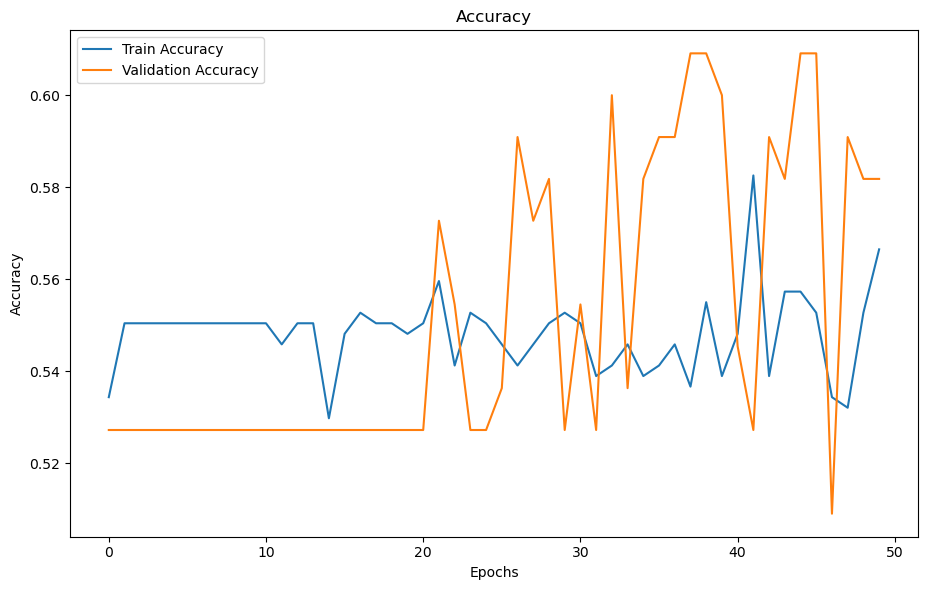

In [58]:
model_0 = Sequential()

model_0.add(LSTM(units=64, return_sequences=True, input_shape=(x_train_0.shape[1], x_train_0.shape[2])))
model_0.add(Dropout(0.2))
model_0.add(LSTM(units=32, return_sequences=True))
model_0.add(Dropout(0.2))
model_0.add(LSTM(units=16))

model_0.add(Dense(units=1, activation='sigmoid'))

adam = Adam(learning_rate=0.001)

model_0.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model_0.fit(x_train_0, y_train_0, epochs=50, batch_size=32, validation_data=(x_valid_0, y_valid_0))

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(train_precision, label='Train Precision')
# plt.plot(val_precision, label='Validation Precision')
# plt.plot(train_recall, label='Train Recall')
# plt.plot(val_recall, label='Validation Recall')
# plt.title('Precision and Recall')
# plt.xlabel('Epochs')
# plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100
14/14 [==============================] - 5s 93ms/step - loss: 0.6944 - accuracy: 0.5087 - val_loss: 0.6958 - val_accuracy: 0.5273
Epoch 2/100
14/14 [==============================] - 0s 19ms/step - loss: 0.6906 - accuracy: 0.5505 - val_loss: 0.6928 - val_accuracy: 0.5273
Epoch 3/100
14/14 [==============================] - 0s 21ms/step - loss: 0.6898 - accuracy: 0.5505 - val_loss: 0.6921 - val_accuracy: 0.5273
Epoch 4/100
14/14 [==============================] - 0s 20ms/step - loss: 0.6892 - accuracy: 0.5505 - val_loss: 0.6916 - val_accuracy: 0.5273
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 0.6892 - accuracy: 0.5505 - val_loss: 0.6905 - val_accuracy: 0.5273
Epoch 6/100
14/14 [==============================] - 0s 20ms/step - loss: 0.6908 - accuracy: 0.5505 - val_loss: 0.6917 - val_accuracy: 0.5273
Epoch 7/100
14/14 [==============================] - 0s 19ms/step - loss: 0.6890 - accuracy: 0.5505 - val_loss: 0.6916 - val_accuracy: 0.5273
Epoch 

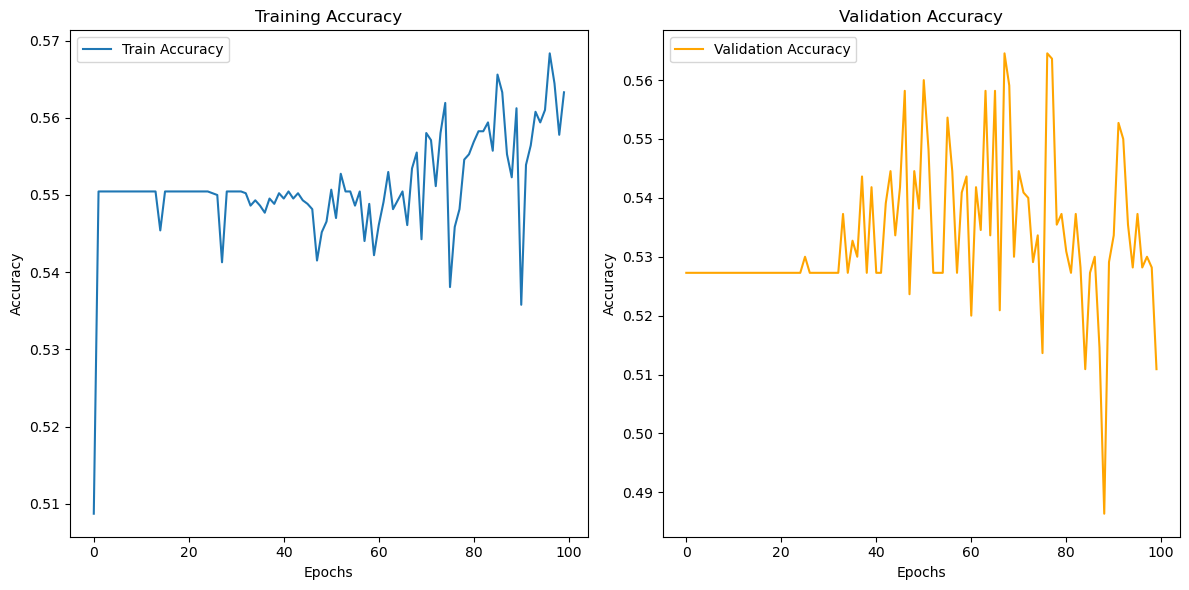

In [56]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train_0.shape[1], x_train_0.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

adam = Adam(learning_rate=0.001)


history = model.fit(x_train_0, y_train_0, epochs=100, batch_size=32, validation_data=(x_valid_0, y_valid_0))

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


4/4 [==============================] - 1s 5ms/step
[0.55556387 0.5678425  0.46608675 0.55244434 0.5154218  0.59958
 0.5640804  0.48233986 0.46128333 0.5925866  0.50629395 0.53386474
 0.6035978  0.5011023  0.61528254 0.5669996  0.5331288  0.58015054
 0.504071   0.52473104 0.50278634 0.6042166  0.52721334 0.58636767
 0.59995395 0.5527491  0.57804835 0.6039539  0.49746916 0.5183623
 0.53872263 0.6283627  0.49800307 0.5572691  0.53778154 0.57480896
 0.51708317 0.5933862  0.62562245 0.5110715  0.5445654  0.4656365
 0.5460783  0.5249443  0.47519752 0.5660322  0.58894795 0.60180616
 0.582592   0.5761539  0.58508444 0.46590713 0.5874603  0.6076618
 0.49719158 0.6094015  0.5080092  0.603751   0.5206965  0.59623086
 0.46299872 0.56647396 0.5818004  0.46201783 0.5994128  0.558802
 0.5738497  0.45855576 0.46392474 0.5304279  0.54402596 0.4586416
 0.45696563 0.6002546  0.5022414  0.6279082  0.4758593  0.46573076
 0.5098515  0.5606608  0.5493016  0.5224713  0.56716967 0.4649378
 0.56734955 0.5377317

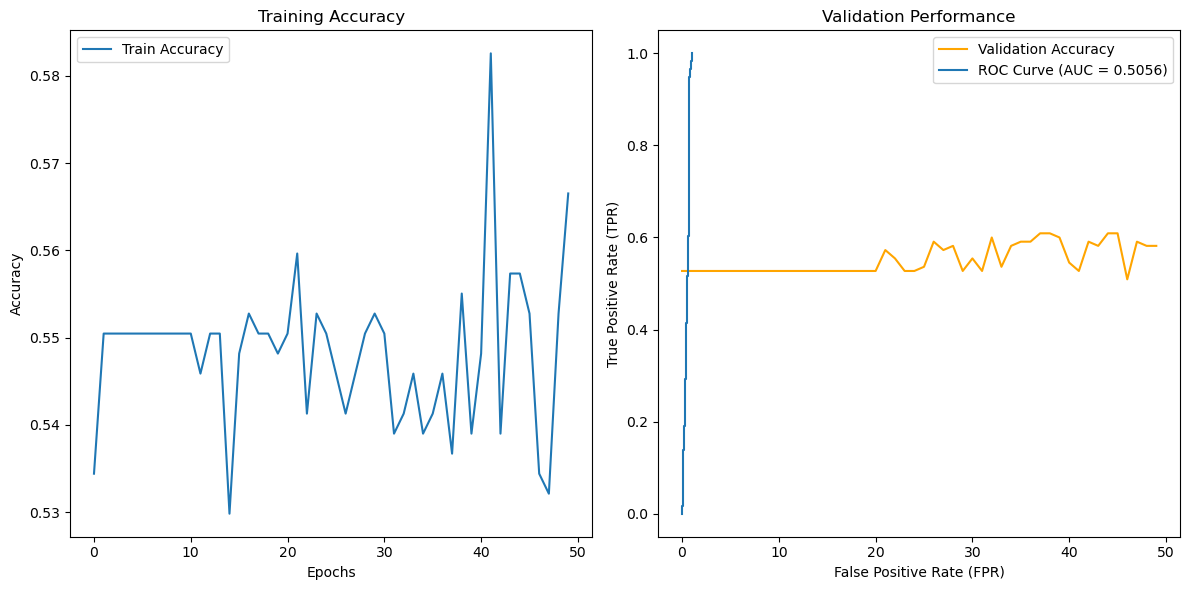

In [59]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model_0.predict(x_valid_0)
y_pred = y_pred_proba[:, 0]
print(y_pred)
fpr, tpr, thresholds = roc_curve(y_valid_0.ravel(), y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.title('Validation Performance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

plt.tight_layout()
plt.show()